In this notebook I try to asses whether the algorithm is *numerically* ill-posed, as the eigenvalues of $e^{-\tau L}$ get really small so there is no difference between any Laplacian when $\tau$ goes to $\infty$ as that is just the matrix $J_n=\{\frac{1}{n}\}_{ij}$, that is why we implement the regularization terms, but then the regularized solution is not the real solution, *is it near the real solution*? I also would not expect the solution to dramatically change for little changes over the regularization parameters.

In [34]:
import learnHeat as lh
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

np.random.seed(10)

Let
$X=\texttt{create\_signal}(L_0,H_0,\tau_0)$ be created from three ground inputs

if I feed the learning algorithm with two of the three ground inputs, I would expect to recover the same solution near the real solution for all three choices of excluded ground inputs


$\text{res} = \texttt{learnHeat}(X,L_{rand},H_0,\tau_0)\\
=\texttt{learnHeat}(X,L_0,H_{rand},\tau_0)
\\=\texttt{learnHeat}(X,L_0,H_0,\tau_{rand})$

In [35]:
N = 10 # number of vertices
M = 60 # number of signals (I put a lot of signals just in case)
tau_ground = [2.5,4] # as in paper
X, L_ground, H_ground, tau_ground = lh.create_signal(N=N,M=M,p=0.3,tau_ground=tau_ground,se=0) # no noise

Now I will not feed the real Laplacian

In [36]:
res = lh.learn_heat(X,H0=H_ground,tau0=tau_ground,beta=0.05)

Learning progress:   0%|          | 0/100 [00:00<?, ?it/s]

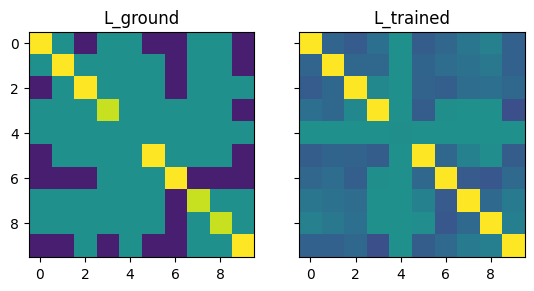

In [37]:
vmin = -0.5
vmax = 0.5
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(L_ground/np.trace(L_ground)*N, vmin = vmin, vmax = vmax)
ax1.set_title('L_ground')
ax2.imshow(res["L"], vmin = vmin, vmax = vmax)
ax2.set_title('L_trained')
plt.show()

I think we can't actually assess the quality of the learned Laplacian without the precision and the recall. We can draw the precision-recall curve to be extremelly fair. In the paper, the threshold for which an edge is deprecated (the filter to the entries of the Laplacian) is $0.0001$. Of course if they feed 20000 signals like in the paper, the algorithm will work, but that is just plain useless in real applications.

In [38]:
# checking the least squares loss for the learned laplacian
np.linalg.norm(X-lh.D(res["L"],tau_ground)@H_ground,'fro')**2
# is not bad!!

0.05803559073094958

In [39]:
precision, recall = lh.heat_scores(L1=res["L"],L2=L_ground)

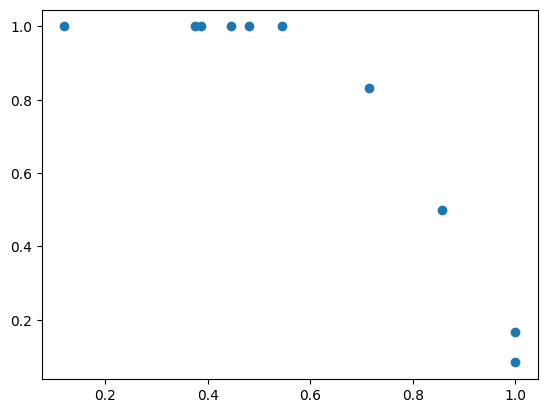

In [40]:
plt.scatter(precision,recall)

So there is a threshold for which the precision recall is circa 0.8,0.8, but the threshold is not known without the L_ground, so the algorithm usefulness is questionable. Let me feed the algorithm with the ground values and let me set the regularization terms to 0.

In [41]:
res2 = lh.learn_heat(X,L0=L_ground,H0=H_ground,tau0=tau_ground,alpha=0,beta=0)

Learning progress:   0%|          | 0/100 [00:00<?, ?it/s]

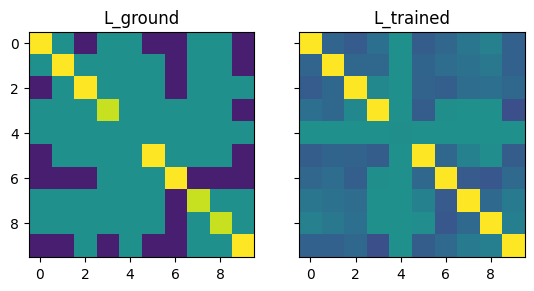

In [42]:
vmin = -0.5
vmax = 0.5
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(L_ground/np.trace(L_ground)*N, vmin = vmin, vmax = vmax)
ax1.set_title('L_ground')
ax2.imshow(res["L"], vmin = vmin, vmax = vmax)
ax2.set_title('L_trained')
plt.show()

Again, can't assess without precision recall.

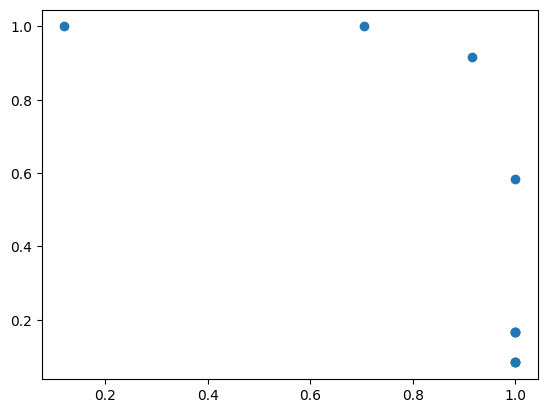

In [43]:
precision2, recall2 = lh.heat_scores(L1=res2["L"],L2=L_ground)
plt.scatter(precision2, recall2)

Hey it works, but again, how do I even know the threshold, do I need to feed it 20000 signals so I only need a threshold of 10e-4? How do I find 20000 signals in real life? Big data? The thing about the uber voyages?

Last try, feeding all correctly except $\tau$ (suppose I have no clue of what the real $\tau$ is) that means $H_0$ is not feeded because I would need to know $S$ also

In [44]:
res3 = lh.learn_heat(X,L0=L_ground,tau0=[1],alpha=0.1,beta=0.05)

Learning progress:   0%|          | 0/100 [00:00<?, ?it/s]

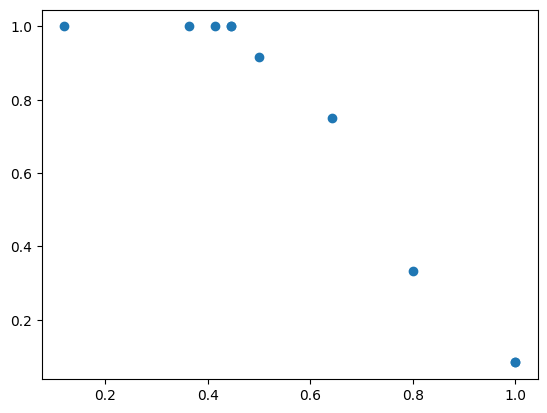

In [45]:
precision3, recall3 = lh.heat_scores(L1=res3["L"],L2=L_ground)
plt.scatter(precision3, recall3)